<a href="https://colab.research.google.com/github/raghavadit/machine-learning/blob/master/Copy_of_linear_regression_prajakta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 class MyLinearRegression:
    def __init__(self, weight= 7  , bias=3    , learning_rate=0.001    ,
                 iterations=  150):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0

    def predict(self, x):
        predicted_set = []
        for i in range(len(x)):
            predicted_value = self.weight * x[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, x, y):
        count = len(x)
        total_error = 0.0
        for i in range(count):
            total_error += (y[i] - (self.weight * x[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, x, y):
        weight_deriv = 0
        bias_deriv = 0
        count = len(x)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * x[i] * (y[i] -(self.weight * x[i] + self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (y[i] - (self.weight * x[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, x, y):
        for i in range(self.iterations):
            self.update_weights(x, y)
            # Calculating cost
            self.cost = self.cost_function(x, y)
            self.cost_trend.append(self.cost)
           # if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".format(i, self.weight, self.bias, self.cost))

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Hours':[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8], 
        'Scores':[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


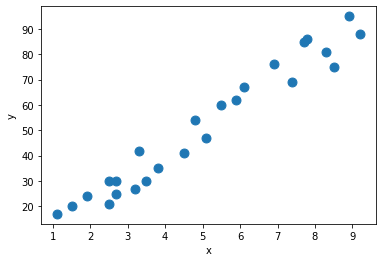

In [41]:
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y,s=80)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [42]:
#from my_linear_regression import MyLinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset

X = studentscores.iloc[:, :-1].values
y = studentscores.iloc[:, -1].values
X,y
print(x)
print(y)

[2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5, 3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)


Iteration: 0	 Weight: [7.1785075]	 Bias: [3.0274]	 Cost: 116.52412158119293
Iteration: 1	 Weight: [7.34453788]	 Bias: [3.05286195]	 Cost: 102.91008189424169
Iteration: 2	 Weight: [7.49896351]	 Bias: [3.07652135]	 Cost: 91.13317278598234
Iteration: 3	 Weight: [7.64259572]	 Bias: [3.09850424]	 Cost: 80.94548387910852
Iteration: 4	 Weight: [7.77618918]	 Bias: [3.11892785]	 Cost: 72.13255889976814
Iteration: 5	 Weight: [7.90044573]	 Bias: [3.13790119]	 Cost: 64.50888123548864
Iteration: 6	 Weight: [8.01601819]	 Bias: [3.15552569]	 Cost: 57.91396869153091
Iteration: 7	 Weight: [8.12351371]	 Bias: [3.17189565]	 Cost: 52.2089952377883
Iteration: 8	 Weight: [8.223497]	 Bias: [3.18709879]	 Cost: 47.27386863183723
Iteration: 9	 Weight: [8.3164933]	 Bias: [3.20121669]	 Cost: 43.00470240023128
Iteration: 10	 Weight: [8.40299109]	 Bias: [3.21432526]	 Cost: 39.31162896162283
Iteration: 11	 Weight: [8.48344473]	 Bias: [3.22649505]	 Cost: 36.11690785655269
Iteration: 12	 Weight: [8.55827681]	 Bias: [3

In [0]:
# scatterplot of no of iterations and cost


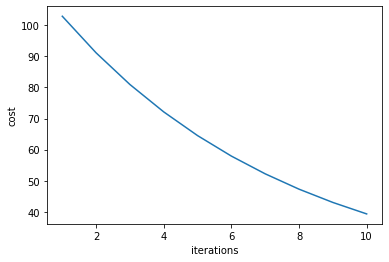

In [46]:
iterations=[1,2,3,4,5,6,7,8,9,10]
cost =[102.91008189424169,91.13317278598234,80.94548387910852,72.13255889976814,64.50888123548864,57.91396869153091,52.2089952377883,47.27386863183723,43.00470240023128,39.31162896162283]
plt.plot(iterations,cost)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()